In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

plt.rc('font', family='NanumBarunGothic') 
# -*- coding: utf-8 -*-

In [ ]:
!sudo apt-get install -y fonts-nanum
!sudo fc-cache -fv
!rm ~/.cache/matplotlib -rf

Reading package lists... Done
Building dependency tree       
Reading state information... Done
fonts-nanum is already the newest version (20170925-1).
The following package was automatically installed and is no longer required:
  libnvidia-common-440
Use 'sudo apt autoremove' to remove it.
0 upgraded, 0 newly installed, 0 to remove and 39 not upgraded.
/usr/share/fonts: caching, new cache contents: 0 fonts, 1 dirs
/usr/share/fonts/truetype: caching, new cache contents: 0 fonts, 3 dirs
/usr/share/fonts/truetype/humor-sans: caching, new cache contents: 1 fonts, 0 dirs
/usr/share/fonts/truetype/liberation: caching, new cache contents: 16 fonts, 0 dirs
/usr/share/fonts/truetype/nanum: caching, new cache contents: 10 fonts, 0 dirs
/usr/local/share/fonts: caching, new cache contents: 0 fonts, 0 dirs
/root/.local/share/fonts: skipping, no such directory
/root/.fonts: skipping, no such directory
/var/cache/fontconfig: cleaning cache directory
/root/.cache/fontconfig: not cleaning non-existent

In [ ]:
data = pd.read_csv('data.csv',encoding='CP949')
data
data['Category'].value_counts()

전문몰        126062
디저트         89743
할인점         84636
오픈마켓/소셜     80742
뷰티          20453
취미          18449
종합몰         16119
호텔/숙박        8005
항공/여행사       5761
면세점          2068
Name: Category, dtype: int64

In [ ]:
data.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 452038 entries, 0 to 452037
Data columns (total 10 columns):
 #   Column     Non-Null Count   Dtype 
---  ------     --------------   ----- 
 0   YM         452038 non-null  int64 
 1   Category   452038 non-null  object
 2   성별구분       452038 non-null  int64 
 3   연령대        452038 non-null  object
 4   기혼스코어      452038 non-null  object
 5   유아자녀스코어    452038 non-null  object
 6   초등학생자녀스코어  452038 non-null  object
 7   중고생자녀스코어   452038 non-null  object
 8   대학생자녀스코어   452038 non-null  object
 9   전업주부스코어    452038 non-null  object
dtypes: int64(2), object(8)
memory usage: 34.5+ MB


In [ ]:
data

,YM,Category,성별구분,연령대,기혼스코어,유아자녀스코어,초등학생자녀스코어,중고생자녀스코어,대학생자녀스코어,전업주부스코어
0,202005,할인점,0,F,high,low,high,mid,low,low
1,202005,취미,0,B,high,low,mid,mid,low,low
2,202005,오픈마켓/소셜,1,D,mid,mid,mid,mid,low,mid
3,202005,뷰티,0,D,mid,mid,mid,mid,low,low
4,202005,오픈마켓/소셜,0,G,high,low,mid,mid,mid,low
...,...,...,...,...,...,...,...,...,...,...
452033,201904,전문몰,0,E,low,mid,low,low,low,low
452034,201904,할인점,0,H,high,low,low,low,low,low
452035,201904,할인점,1,H,high,low,low,low,low,low
452036,201904,할인점,0,H,high,low,low,low,low,low


In [ ]:
data['전업주부스코어'].value_counts()

low     229843
mid     200448
high     21747
Name: 전업주부스코어, dtype: int64

In [ ]:
data['연령대'].value_counts()

D    76172
A    71640
F    70151
C    56270
E    54574
G    51095
H    37111
B    35025
Name: 연령대, dtype: int64

In [ ]:
data["Category"].value_counts()

전문몰        126062
디저트         89743
할인점         84636
오픈마켓/소셜     80742
뷰티          20453
취미          18449
종합몰         16119
호텔/숙박        8005
항공/여행사       5761
면세점          2068
Name: Category, dtype: int64

In [ ]:
data2 = pd.DataFrame(data)

In [ ]:
data2['전업주부스코어'].value_counts()

low     229843
mid     200448
high     21747
Name: 전업주부스코어, dtype: int64

In [ ]:
attributes = ['연령대','Category','기혼스코어','유아자녀스코어','초등학생자녀스코어','중고생자녀스코어','대학생자녀스코어','전업주부스코어']

from sklearn.preprocessing import OrdinalEncoder
ordinal_encoder = OrdinalEncoder()
data_score = ordinal_encoder.fit_transform(data2[attributes])

data2[attributes] = data_score

In [ ]:
data2

,Category,성별구분,연령대,기혼스코어,유아자녀스코어,초등학생자녀스코어,중고생자녀스코어,대학생자녀스코어,전업주부스코어,Year,Month
0,7.0,0,5.0,0.0,1.0,0.0,2.0,1.0,1.0,2020,5
1,6.0,0,1.0,0.0,1.0,2.0,2.0,1.0,1.0,2020,5
2,3.0,1,3.0,2.0,2.0,2.0,2.0,1.0,2.0,2020,5
3,2.0,0,3.0,2.0,2.0,2.0,2.0,1.0,1.0,2020,5
4,3.0,0,6.0,0.0,1.0,2.0,2.0,2.0,1.0,2020,5
...,...,...,...,...,...,...,...,...,...,...,...
452033,4.0,0,4.0,1.0,2.0,1.0,1.0,1.0,1.0,2019,4
452034,7.0,0,7.0,0.0,1.0,1.0,1.0,1.0,1.0,2019,4
452035,7.0,1,7.0,0.0,1.0,1.0,1.0,1.0,1.0,2019,4
452036,7.0,0,7.0,0.0,1.0,1.0,1.0,1.0,1.0,2019,4


In [ ]:
data2['Category'].value_counts()

4.0    126062
0.0     89743
7.0     84636
3.0     80742
2.0     20453
6.0     18449
5.0     16119
9.0      8005
8.0      5761
1.0      2068
Name: Category, dtype: int64

In [ ]:
data2['연령대'].value_counts()

3.0    76172
0.0    71640
5.0    70151
2.0    56270
4.0    54574
6.0    51095
7.0    37111
1.0    35025
Name: 연령대, dtype: int64

In [ ]:
data2['YM'] = data2['YM'].apply(str)

In [ ]:
data2['YM'].value_counts()

201905    121451
201904    120119
202005    109094
202004    101374
Name: YM, dtype: int64

In [ ]:
data2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 452038 entries, 0 to 452037
Data columns (total 10 columns):
 #   Column     Non-Null Count   Dtype  
---  ------     --------------   -----  
 0   YM         452038 non-null  object 
 1   Category   452038 non-null  float64
 2   성별구분       452038 non-null  int64  
 3   연령대        452038 non-null  object 
 4   기혼스코어      452038 non-null  float64
 5   유아자녀스코어    452038 non-null  float64
 6   초등학생자녀스코어  452038 non-null  float64
 7   중고생자녀스코어   452038 non-null  float64
 8   대학생자녀스코어   452038 non-null  float64
 9   전업주부스코어    452038 non-null  float64
dtypes: float64(7), int64(1), object(2)
memory usage: 34.5+ MB


In [ ]:
data2.columns

Index(['Category', '성별구분', '연령대', '기혼스코어', '유아자녀스코어', '초등학생자녀스코어', '중고생자녀스코어',
       '대학생자녀스코어', '전업주부스코어', 'Year', 'Month'],
      dtype='object')

In [ ]:
data2['YM'] = pd.to_datetime(data2['YM'],format='%Y%m',errors='raise')

In [ ]:
data2['Year'] = data2['YM'].dt.year
data2['Month'] = data2['YM'].dt.month

In [ ]:
data2

,YM,Category,성별구분,연령대,기혼스코어,유아자녀스코어,초등학생자녀스코어,중고생자녀스코어,대학생자녀스코어,전업주부스코어,Year,Month
0,2020-05-01,7.0,0,F,0.0,1.0,0.0,2.0,1.0,1.0,2020,5
1,2020-05-01,6.0,0,B,0.0,1.0,2.0,2.0,1.0,1.0,2020,5
2,2020-05-01,3.0,1,D,2.0,2.0,2.0,2.0,1.0,2.0,2020,5
3,2020-05-01,2.0,0,D,2.0,2.0,2.0,2.0,1.0,1.0,2020,5
4,2020-05-01,3.0,0,G,0.0,1.0,2.0,2.0,2.0,1.0,2020,5
...,...,...,...,...,...,...,...,...,...,...,...,...
452033,2019-04-01,4.0,0,E,1.0,2.0,1.0,1.0,1.0,1.0,2019,4
452034,2019-04-01,7.0,0,H,0.0,1.0,1.0,1.0,1.0,1.0,2019,4
452035,2019-04-01,7.0,1,H,0.0,1.0,1.0,1.0,1.0,1.0,2019,4
452036,2019-04-01,7.0,0,H,0.0,1.0,1.0,1.0,1.0,1.0,2019,4


In [ ]:
del data2['YM']

In [ ]:
data2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 452038 entries, 0 to 452037
Data columns (total 11 columns):
 #   Column     Non-Null Count   Dtype  
---  ------     --------------   -----  
 0   Category   452038 non-null  float64
 1   성별구분       452038 non-null  int64  
 2   연령대        452038 non-null  float64
 3   기혼스코어      452038 non-null  float64
 4   유아자녀스코어    452038 non-null  float64
 5   초등학생자녀스코어  452038 non-null  float64
 6   중고생자녀스코어   452038 non-null  float64
 7   대학생자녀스코어   452038 non-null  float64
 8   전업주부스코어    452038 non-null  float64
 9   Year       452038 non-null  int64  
 10  Month      452038 non-null  int64  
dtypes: float64(8), int64(3)
memory usage: 37.9 MB


In [ ]:
from sklearn.preprocessing import OneHotEncoder

o_h_encoder = OneHotEncoder()
data_one_hot = o_h_encoder.fit_transform(data2[['연령대']])
data_one_hot = data_one_hot.toarray()

In [ ]:
data_one_hot = pd.DataFrame(data_one_hot)

In [ ]:
data2 = pd.concat([data2,data_one_hot],axis=1)


In [ ]:
data2['연령대_A'] = data2[0]
data2['연령대_B'] = data2[1]
data2['연령대_C'] = data2[2]
data2['연령대_D'] = data2[3]
data2['연령대_E'] = data2[4]
data2['연령대_F'] = data2[5]
data2['연령대_G'] = data2[6]
data2['연령대_H'] = data2[7]

In [ ]:
del data2[0]
del data2[1]
del data2[2]
del data2[3]
del data2[4]
del data2[5]
del data2[6]
del data2[7]


In [ ]:
data2

,Category,성별구분,연령대,기혼스코어,유아자녀스코어,초등학생자녀스코어,중고생자녀스코어,대학생자녀스코어,전업주부스코어,Year,Month
0,7.0,0,5.0,0.0,1.0,0.0,2.0,1.0,1.0,2020,5
1,6.0,0,1.0,0.0,1.0,2.0,2.0,1.0,1.0,2020,5
2,3.0,1,3.0,2.0,2.0,2.0,2.0,1.0,2.0,2020,5
3,2.0,0,3.0,2.0,2.0,2.0,2.0,1.0,1.0,2020,5
4,3.0,0,6.0,0.0,1.0,2.0,2.0,2.0,1.0,2020,5
...,...,...,...,...,...,...,...,...,...,...,...
452033,4.0,0,4.0,1.0,2.0,1.0,1.0,1.0,1.0,2019,4
452034,7.0,0,7.0,0.0,1.0,1.0,1.0,1.0,1.0,2019,4
452035,7.0,1,7.0,0.0,1.0,1.0,1.0,1.0,1.0,2019,4
452036,7.0,0,7.0,0.0,1.0,1.0,1.0,1.0,1.0,2019,4


In [ ]:
del data2['연령대']

In [ ]:
data2

,Category,성별구분,기혼스코어,유아자녀스코어,초등학생자녀스코어,중고생자녀스코어,대학생자녀스코어,전업주부스코어,Year,Month,연령대_A,연령대_B,연령대_C,연령대_D,연령대_E,연령대_F,연령대_G,연령대_H
0,할인점,0,0.0,1.0,0.0,2.0,1.0,1.0,2020,5,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
1,취미,0,0.0,1.0,2.0,2.0,1.0,1.0,2020,5,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
2,오픈마켓/소셜,1,2.0,2.0,2.0,2.0,1.0,2.0,2020,5,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
3,뷰티,0,2.0,2.0,2.0,2.0,1.0,1.0,2020,5,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
4,오픈마켓/소셜,0,0.0,1.0,2.0,2.0,2.0,1.0,2020,5,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
452033,전문몰,0,1.0,2.0,1.0,1.0,1.0,1.0,2019,4,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
452034,할인점,0,0.0,1.0,1.0,1.0,1.0,1.0,2019,4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
452035,할인점,1,0.0,1.0,1.0,1.0,1.0,1.0,2019,4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
452036,할인점,0,0.0,1.0,1.0,1.0,1.0,1.0,2019,4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0


In [ ]:
data3 = np.array(data2)
data3

array([[7.000e+00, 0.000e+00, 5.000e+00, ..., 1.000e+00, 2.020e+03,
        5.000e+00],
       [6.000e+00, 0.000e+00, 1.000e+00, ..., 1.000e+00, 2.020e+03,
        5.000e+00],
       [3.000e+00, 1.000e+00, 3.000e+00, ..., 2.000e+00, 2.020e+03,
        5.000e+00],
       ...,
       [7.000e+00, 1.000e+00, 7.000e+00, ..., 1.000e+00, 2.019e+03,
        4.000e+00],
       [7.000e+00, 0.000e+00, 7.000e+00, ..., 1.000e+00, 2.019e+03,
        4.000e+00],
       [7.000e+00, 1.000e+00, 1.000e+00, ..., 2.000e+00, 2.019e+03,
        4.000e+00]])

In [ ]:
data2.loc[0]

Category      할인점
성별구분            0
기혼스코어           0
유아자녀스코어         1
초등학생자녀스코어       0
중고생자녀스코어        2
대학생자녀스코어        1
전업주부스코어         1
Year         2020
Month           5
연령대_A           0
연령대_B           0
연령대_C           0
연령대_D           0
연령대_E           0
연령대_F           1
연령대_G           0
연령대_H           0
Name: 0, dtype: object

In [ ]:
data_corr = data2.corr()
data_corr

,Category,성별구분,연령대,기혼스코어,유아자녀스코어,초등학생자녀스코어,중고생자녀스코어,대학생자녀스코어,전업주부스코어,Year,Month
Category,1.000000,-0.039424,0.030510,-0.049510,-0.028217,-0.018719,0.023950,-0.002766,-0.030367,-0.064184,-0.008383
성별구분,-0.039424,1.000000,0.001616,0.020603,-0.090693,-0.018639,-0.026477,0.059789,0.640788,-0.003119,-0.006273
연령대,0.030510,0.001616,1.000000,-0.121559,-0.283201,0.023777,-0.092467,0.160456,0.032818,0.003928,-0.000464
기혼스코어,-0.049510,0.020603,-0.121559,1.000000,0.343154,0.046630,-0.221269,-0.315335,0.046899,-0.005453,-0.000329
유아자녀스코어,-0.028217,-0.090693,-0.283201,0.343154,1.000000,0.013275,-0.058939,-0.173302,-0.044938,0.008617,0.000254
초등학생자녀스코어,-0.018719,-0.018639,0.023777,0.046630,0.013275,1.000000,0.065219,-0.006006,-0.010498,0.172160,0.152826
중고생자녀스코어,0.023950,-0.026477,-0.092467,-0.221269,-0.058939,0.065219,1.000000,0.090681,-0.024419,0.017804,0.001640
대학생자녀스코어,-0.002766,0.059789,0.160456,-0.315335,-0.173302,-0.006006,0.090681,1.000000,0.038316,0.020415,0.001178
전업주부스코어,-0.030367,0.640788,0.032818,0.046899,-0.044938,-0.010498,-0.024419,0.038316,1.000000,0.009698,-0.003368
Year,-0.064184,-0.003119,0.003928,-0.005453,0.008617,0.172160,0.017804,0.020415,0.009698,1.000000,0.015549


In [ ]:
import os
PROJECT_ROOT_DIR = "."
CHAPTER_ID = "training_linear_models"
IMAGES_PATH = os.path.join(PROJECT_ROOT_DIR, "images", CHAPTER_ID)
os.makedirs(IMAGES_PATH, exist_ok=True)

def save_fig(fig_id, tight_layout=True, fig_extension="png", resolution=300):
    path = os.path.join(IMAGES_PATH, fig_id + "." + fig_extension)
    print("그림 저장:", fig_id)
    if tight_layout:
        plt.tight_layout()
    plt.savefig(path, format=fig_extension, dpi=resolution)

그림 저장: 2020 4월 


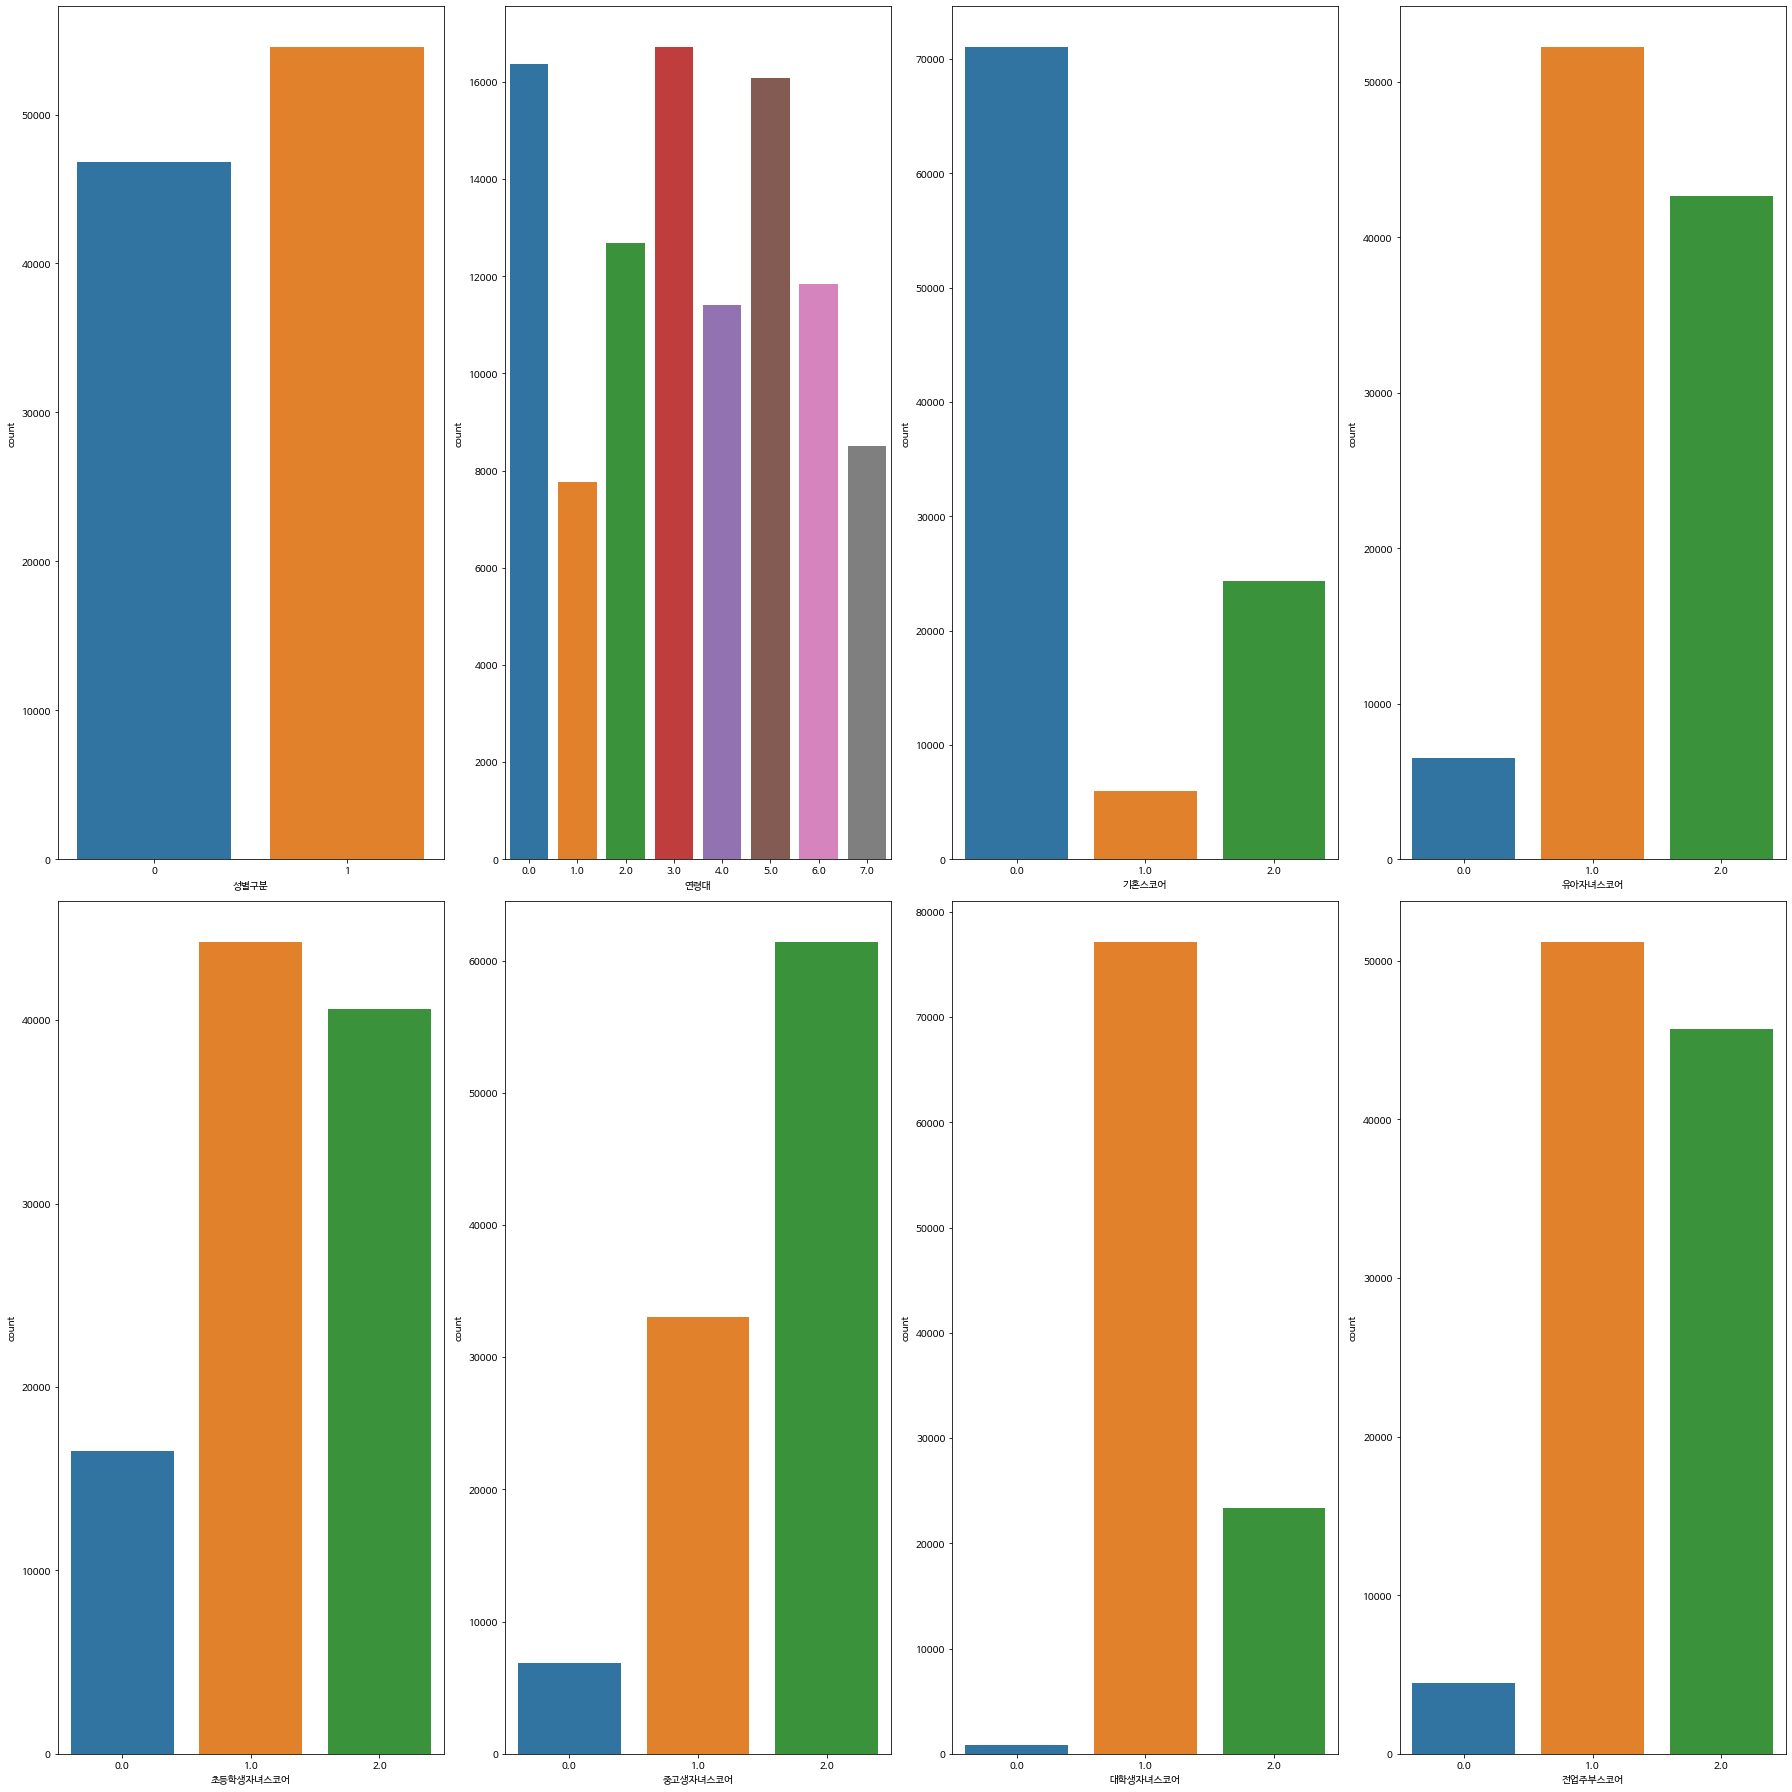

그림 저장: 2020 5월 


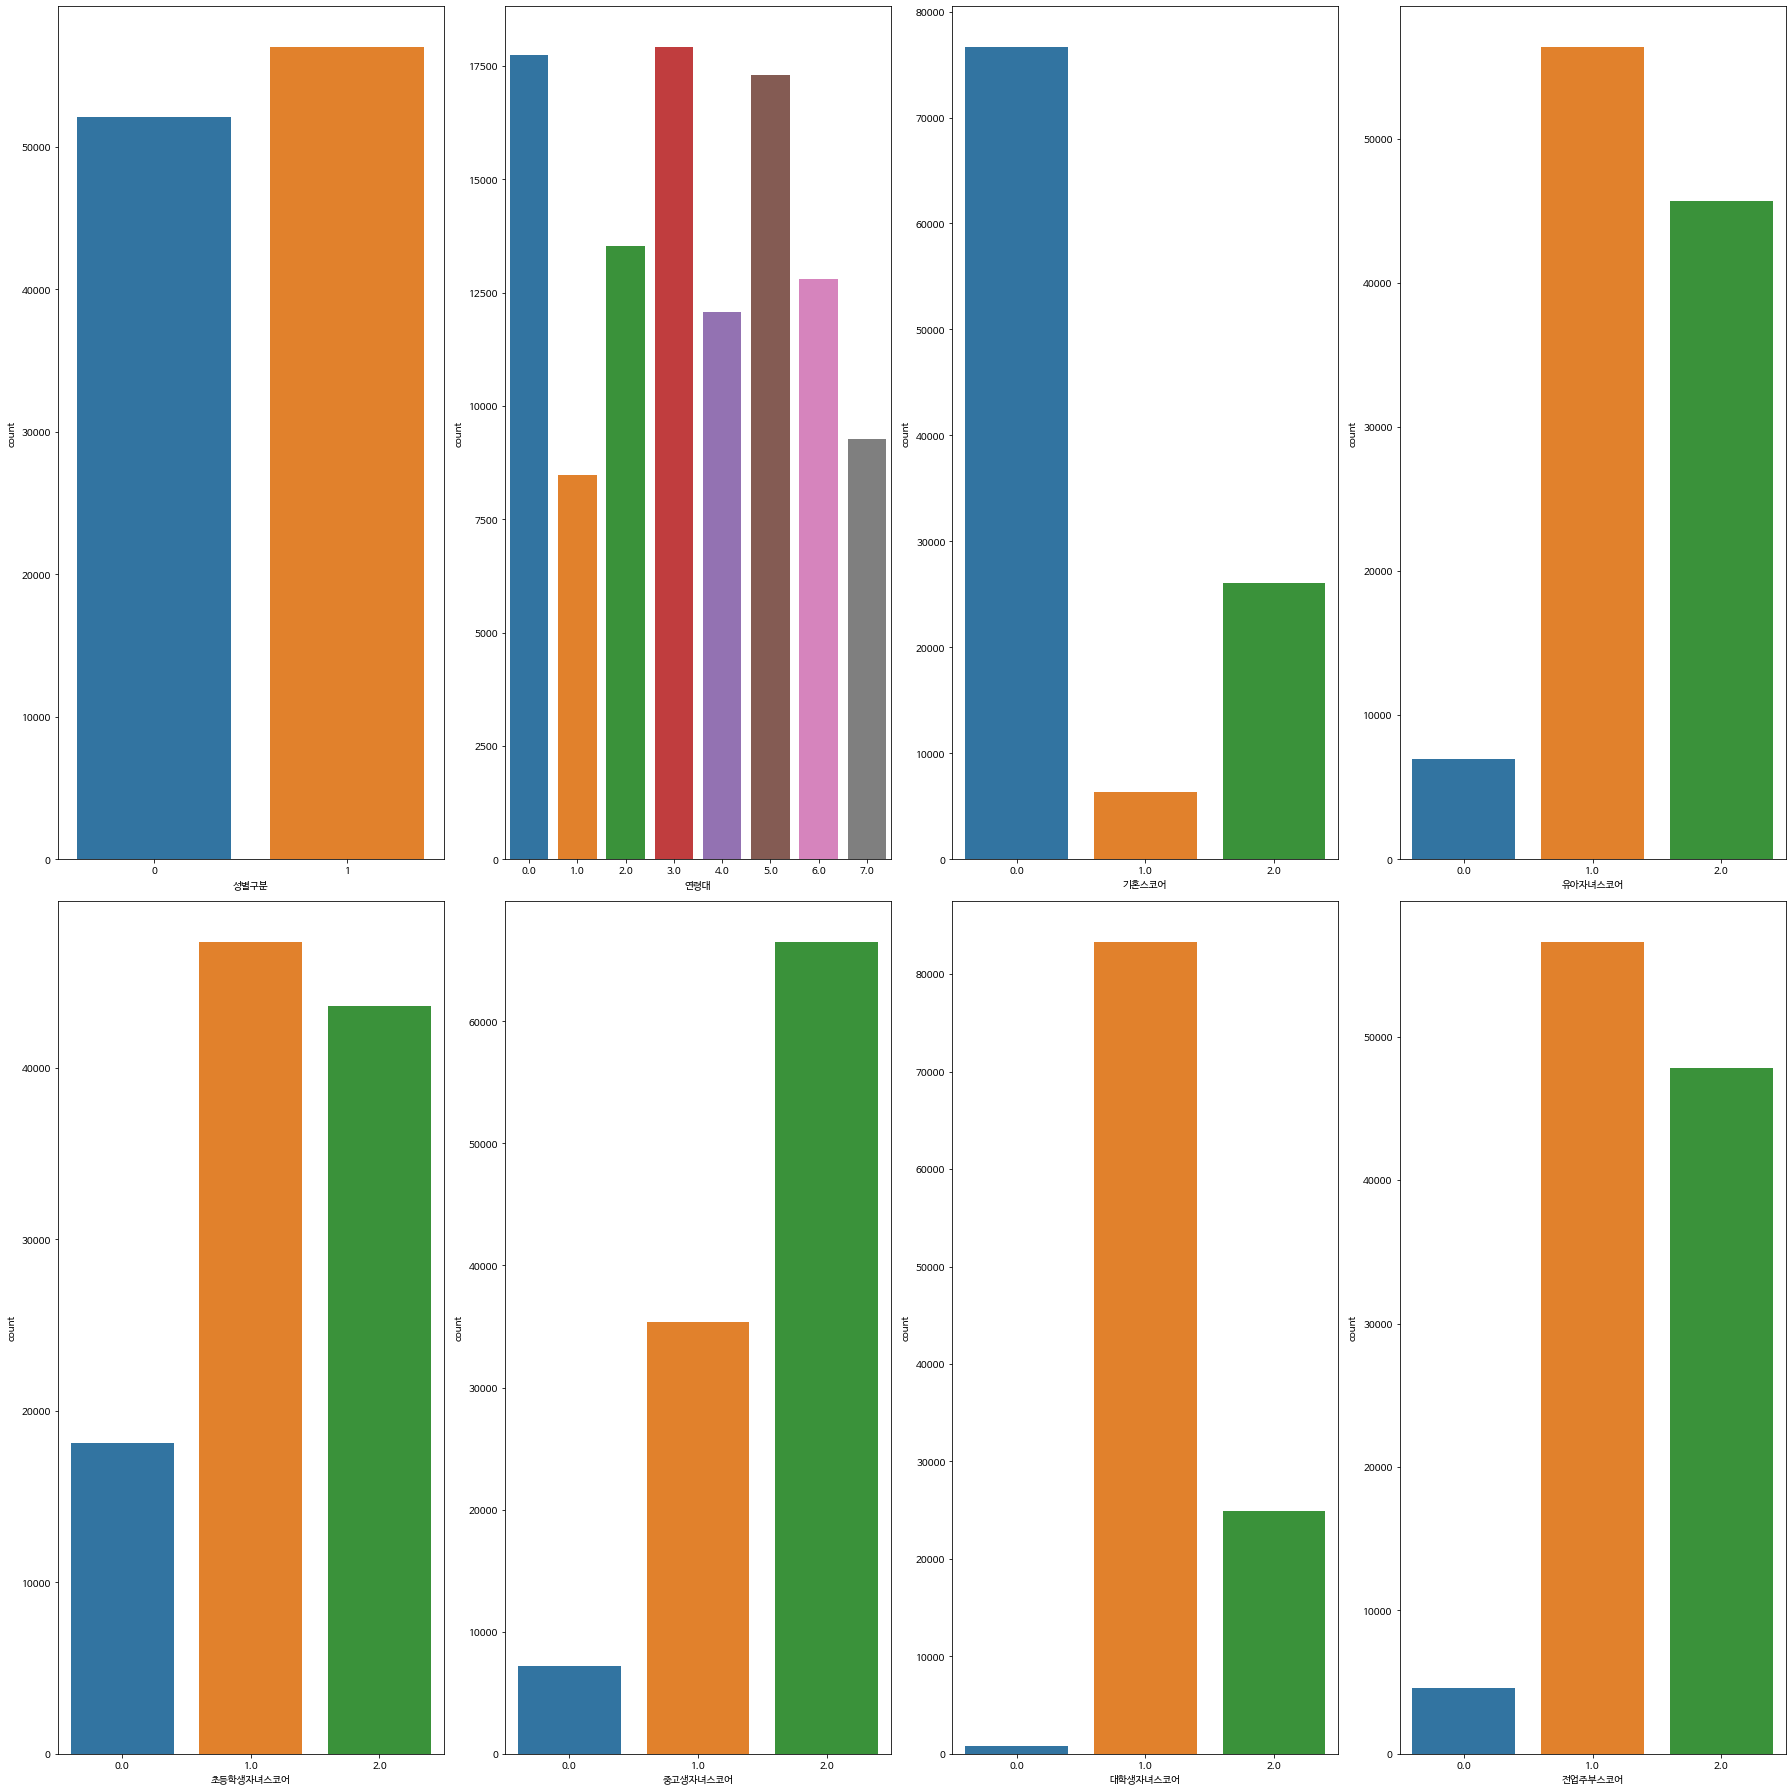

그림 저장: 2019 4월 


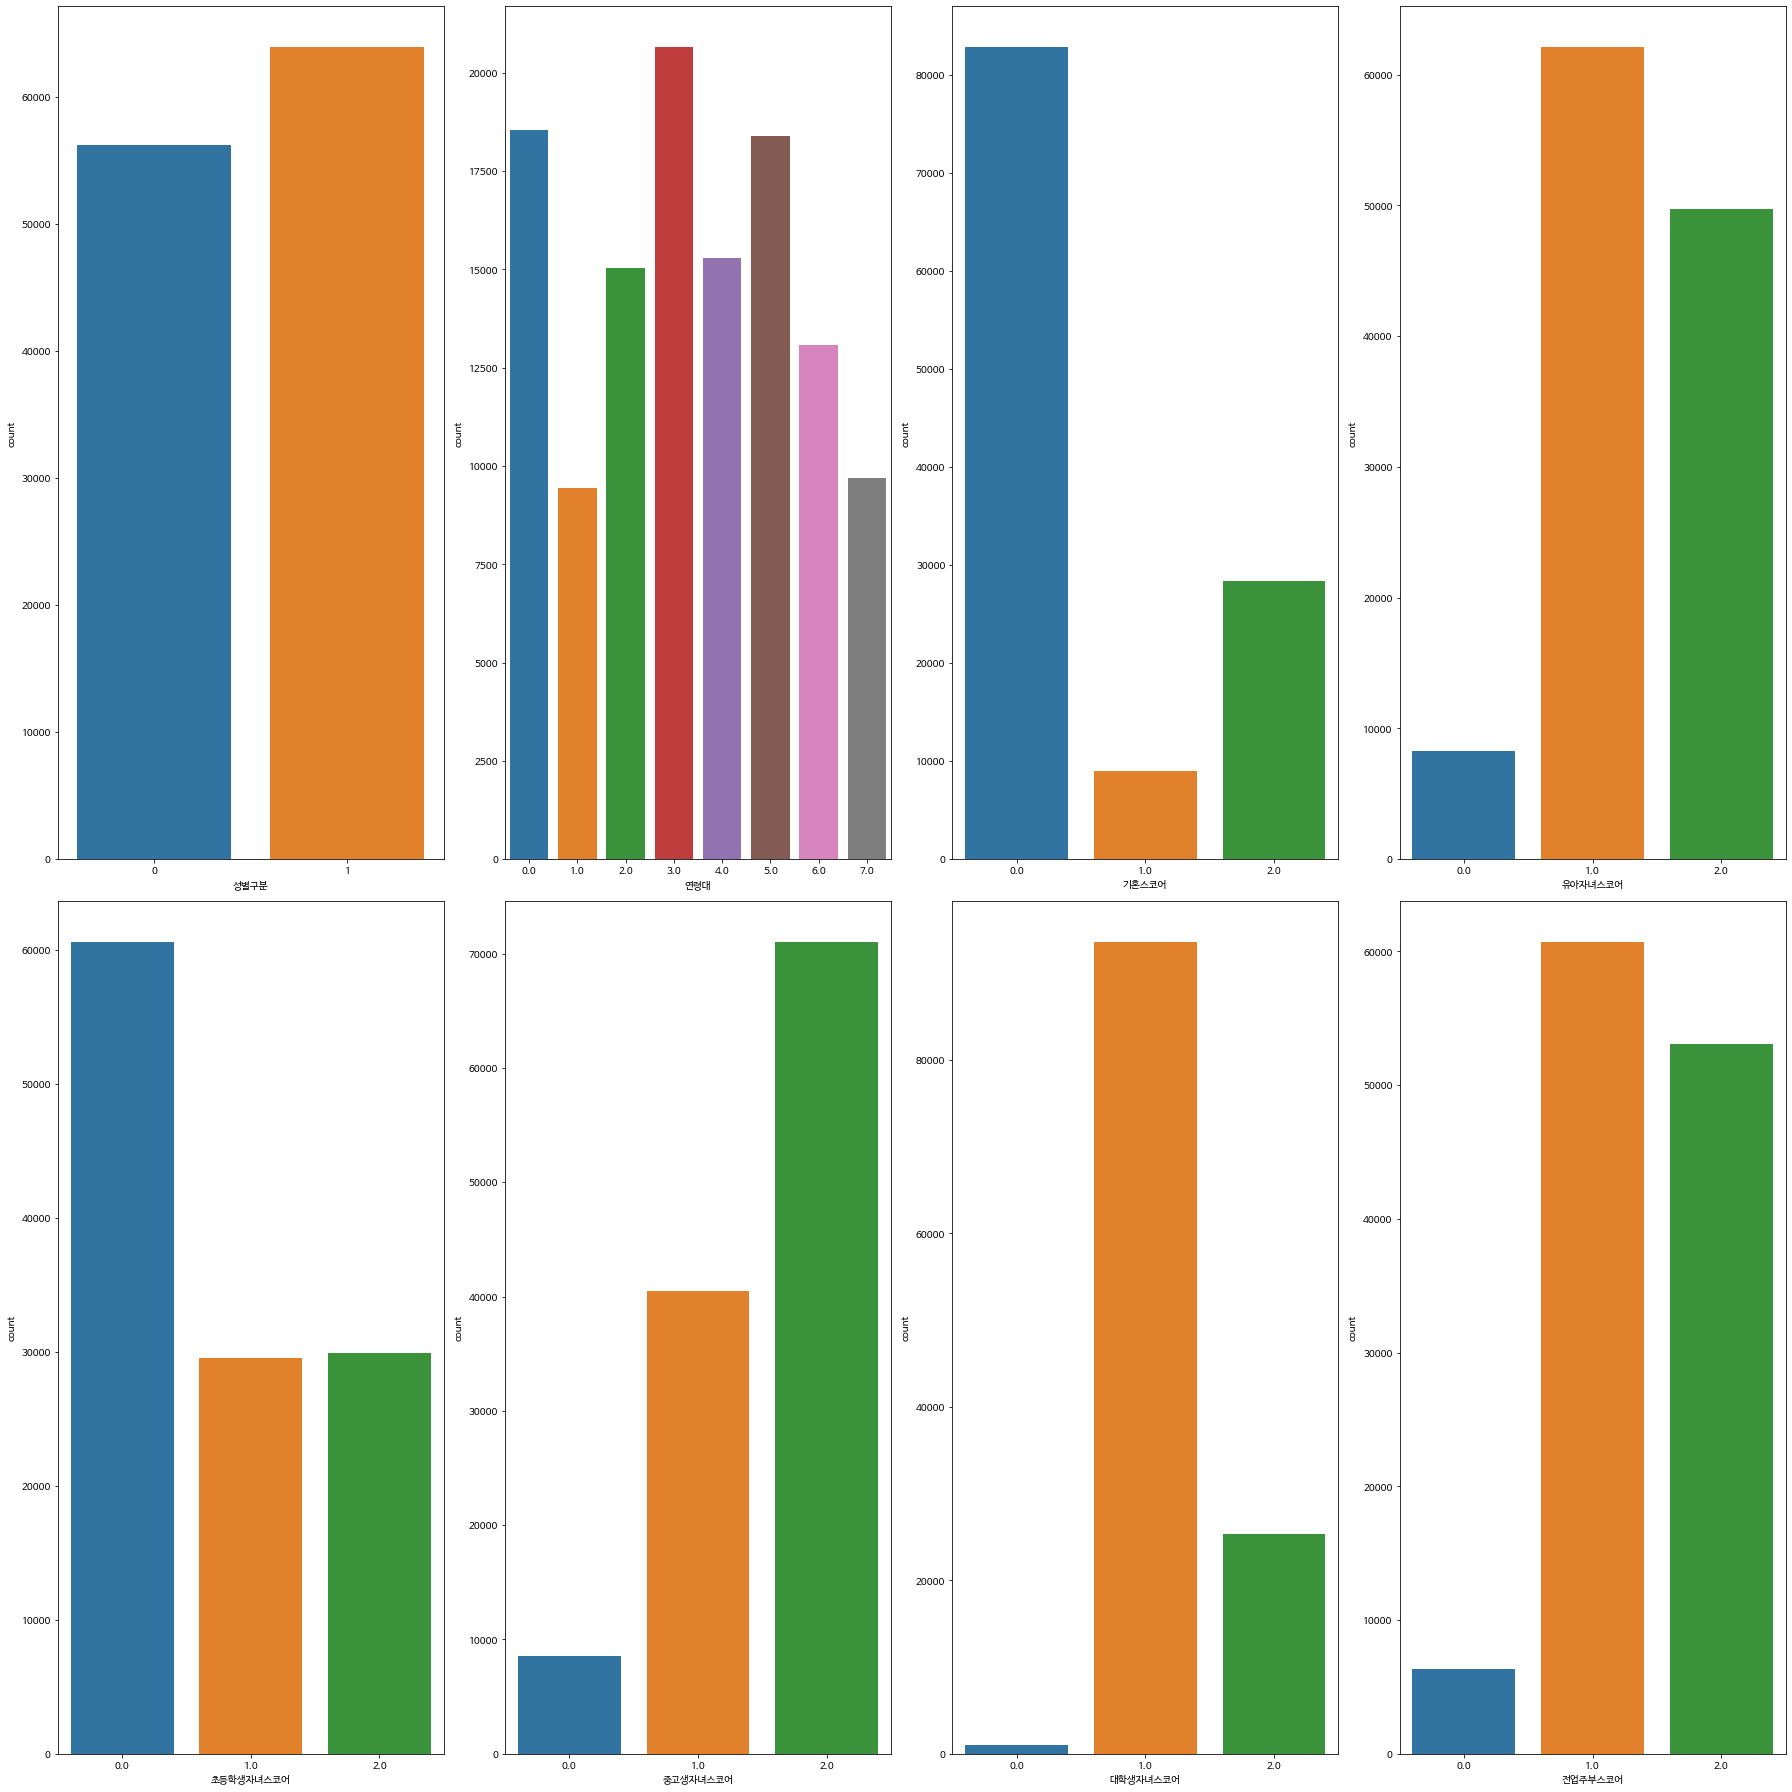

그림 저장: 2019 5월 


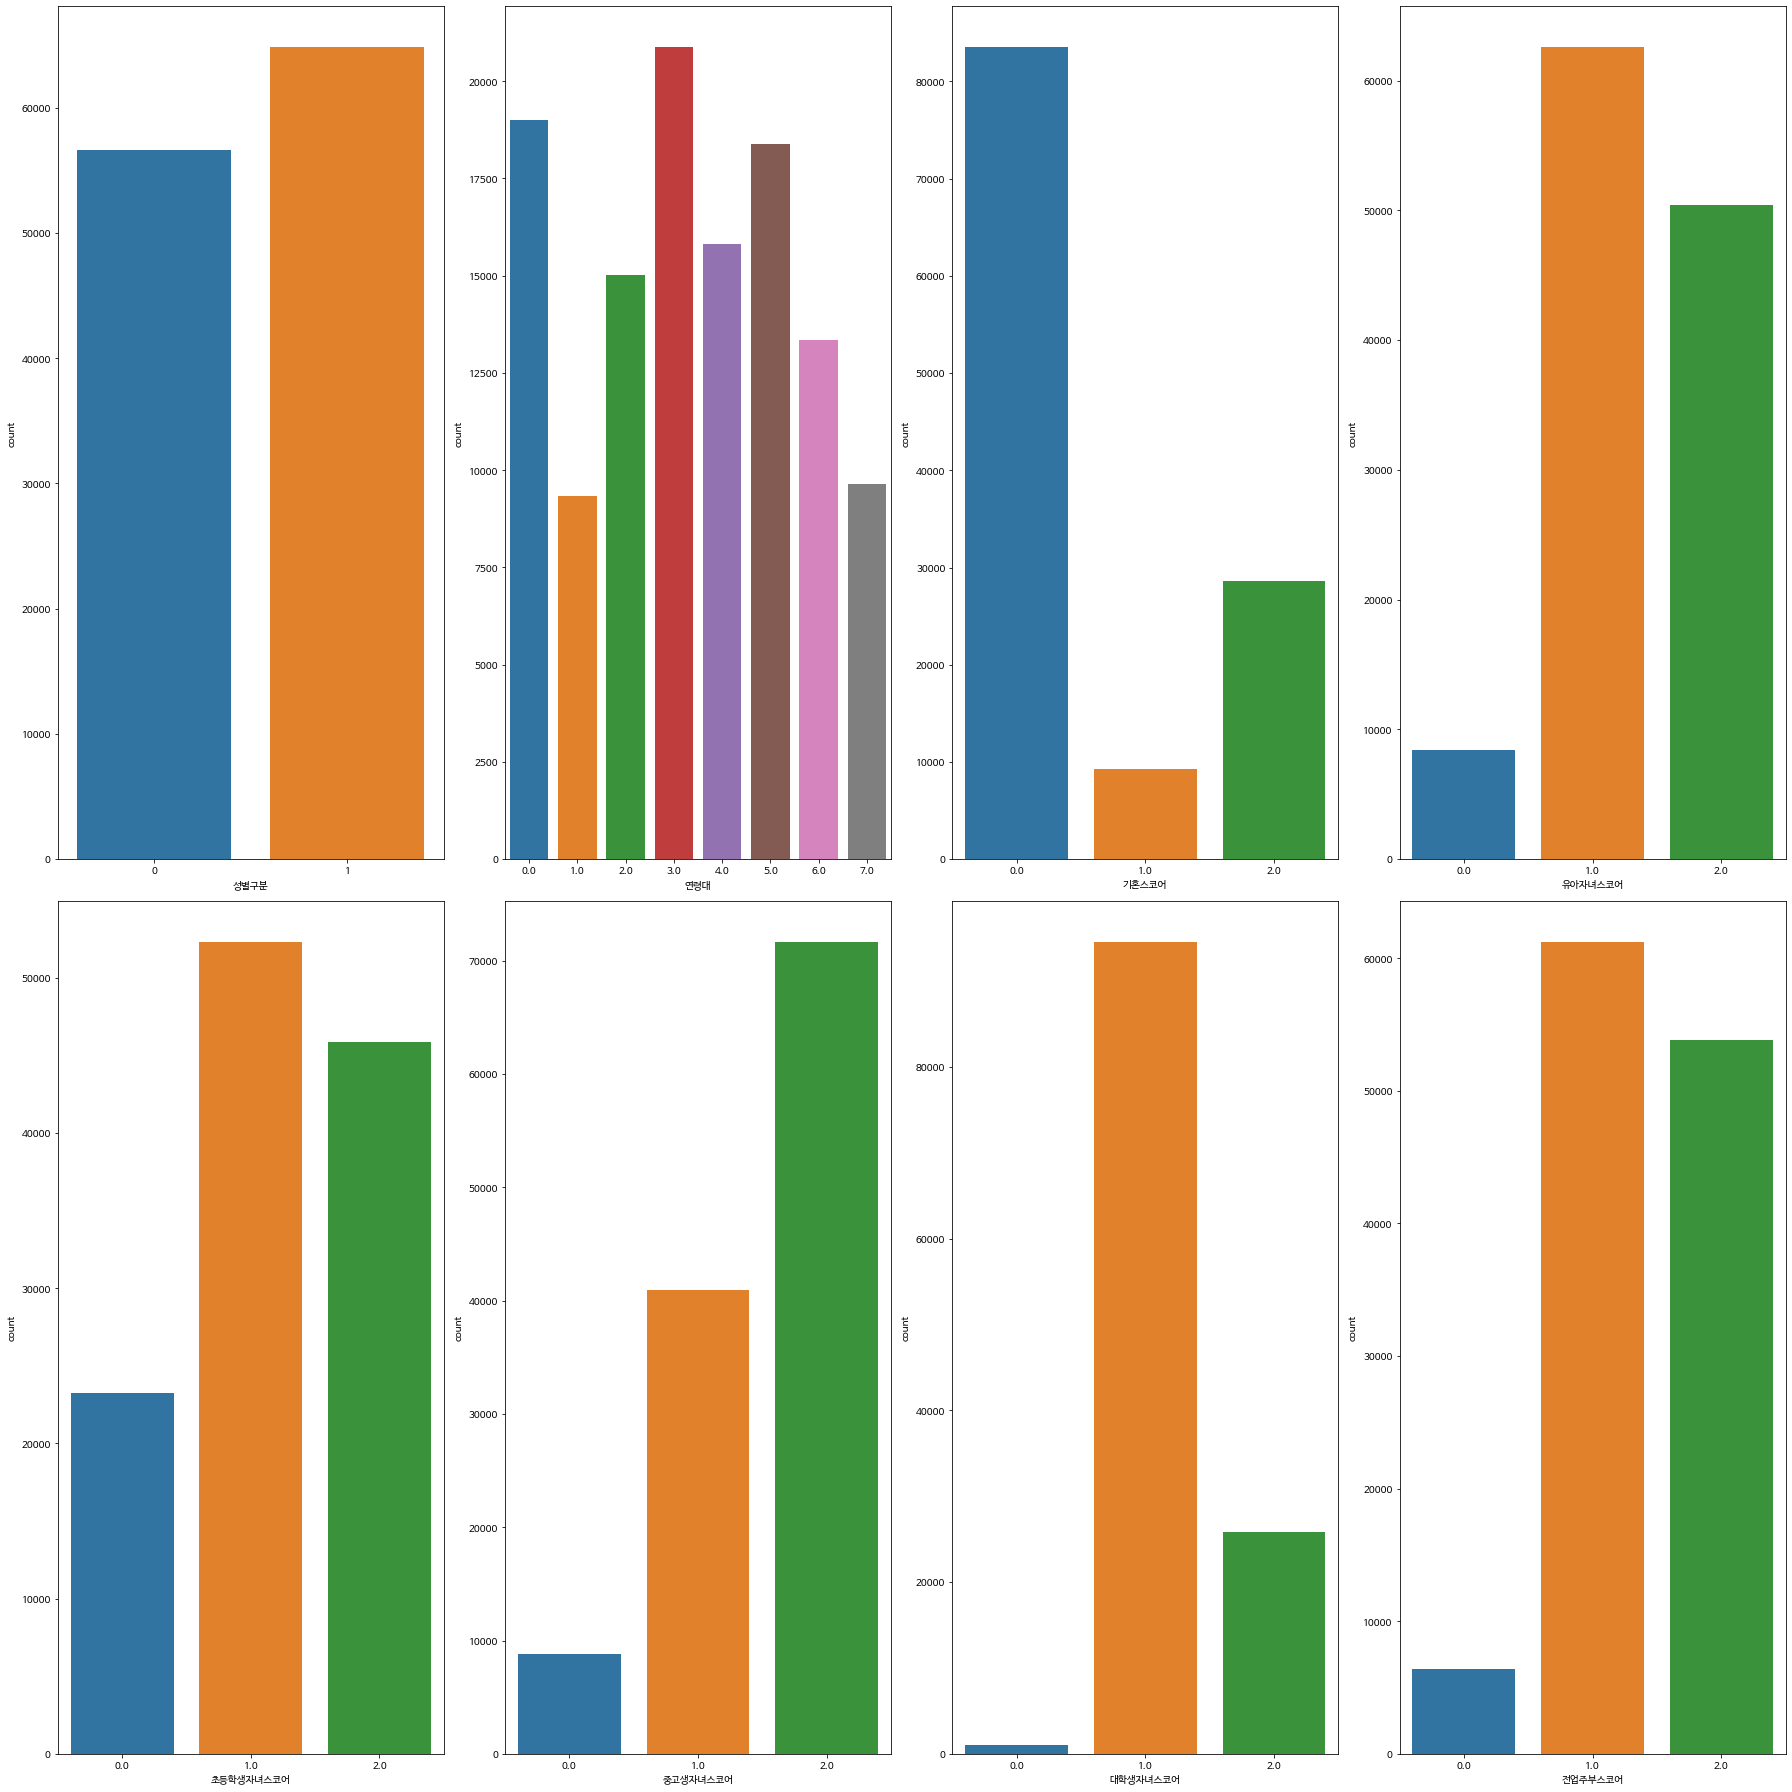

In [ ]:
import seaborn as sns
a = data2[data2['Year'] == 2020]
b = data2[data2['Year'] == 2019]
attributes = ['Category', '성별구분', '연령대', '기혼스코어', '유아자녀스코어', '초등학생자녀스코어', '중고생자녀스코어',
       '대학생자녀스코어', '전업주부스코어', 'Year', 'Month']
# 4.0    전문몰
# 0.0    디저트
# 7.0    할인점
# 3.0    오픈마켓
# 2.0    뷰티
# 6.0    취미
# 5.0    종합몰
# 9.0    호텔/숙박
# 8.0    항공/여행사
# 1.0    면세점

# 3.0   D
# 0.0   A
# 5.0   F
# 2.0   C
# 4.0   E 
# 6.0   G
# 7.0   H 
# 1.0   B
fig = plt.figure(figsize=[25,25])
for i in range(1, 9):
    plt.subplot(2, 4, i)
    ax1 = sns.countplot(x =attributes[i] ,data=a[a['Month'] == 4])
save_fig('2020 4월 ')    
plt.show()
fig = plt.figure(figsize=[25,25])
for i in range(1, 9):
    plt.subplot(2, 4, i)
    ax1 = sns.countplot(x =attributes[i] ,data=a[a['Month'] == 5])
save_fig('2020 5월 ')    
plt.show()
fig = plt.figure(figsize=[25,25])
for i in range(1, 9):
    plt.subplot(2, 4, i)
    ax1 = sns.countplot(x =attributes[i] ,data=b[b['Month'] == 4])
save_fig('2019 4월 ')    
plt.show()
fig = plt.figure(figsize=[25,25])
for i in range(1, 9):
    plt.subplot(2, 4, i)
    ax1 = sns.countplot(x =attributes[i] ,data=b[b['Month'] == 5])
save_fig('2019 5월 ')    
plt.show()



In [ ]:
b.corr()

,Category,성별구분,연령대,기혼스코어,유아자녀스코어,초등학생자녀스코어,중고생자녀스코어,대학생자녀스코어,전업주부스코어,Year,Month
Category,1.000000,-0.043070,0.031986,-0.055779,-0.034604,0.002004,0.033160,-0.001905,-0.033217,NaN,-0.013334
성별구분,-0.043070,1.000000,0.003871,0.016061,-0.080794,-0.014542,-0.025923,0.050157,0.623456,NaN,0.001700
연령대,0.031986,0.003871,1.000000,-0.116456,-0.271569,0.076306,-0.090154,0.148104,0.037214,NaN,-0.001023
기혼스코어,-0.055779,0.016061,-0.116456,1.000000,0.334143,0.050627,-0.214905,-0.310101,0.044323,NaN,0.000895
유아자녀스코어,-0.034604,-0.080794,-0.271569,0.334143,1.000000,-0.036071,-0.054130,-0.162003,-0.039684,NaN,0.000767
초등학생자녀스코어,0.002004,-0.014542,0.076306,0.050627,-0.036071,1.000000,0.043269,0.001349,0.000931,NaN,0.271878
중고생자녀스코어,0.033160,-0.025923,-0.090154,-0.214905,-0.054130,0.043269,1.000000,0.081482,-0.022202,NaN,-0.001752
대학생자녀스코어,-0.001905,0.050157,0.148104,-0.310101,-0.162003,0.001349,0.081482,1.000000,0.032043,NaN,0.002452
전업주부스코어,-0.033217,0.623456,0.037214,0.044323,-0.039684,0.000931,-0.022202,0.032043,1.000000,NaN,0.001261
Year,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7fcf87006be0>,
      dtype=object)

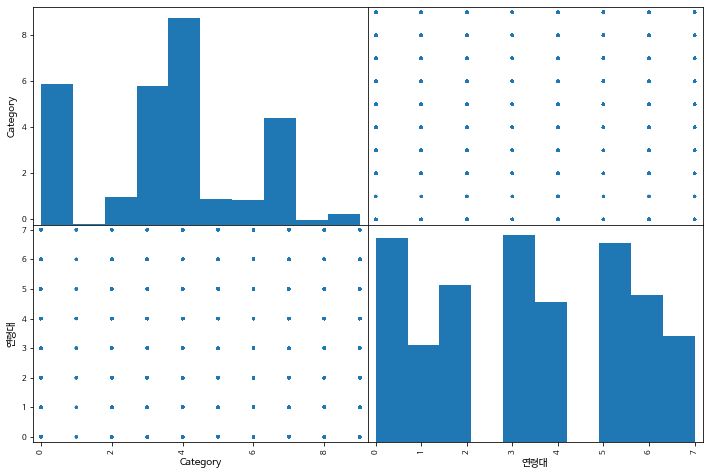

In [ ]:
from pandas.plotting import scatter_matrix

attribute = ["Category","연령대"]
scatter_matrix(a[attribute], figsize=(12,8))

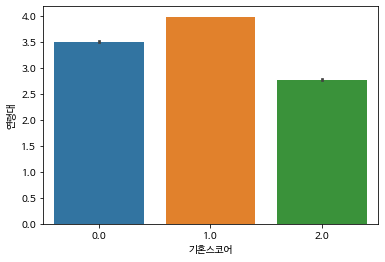

In [ ]:
sns.barplot(x = '기혼스코어',y='연령대',data=a)

그림 저장: 연도별 연령대 2020


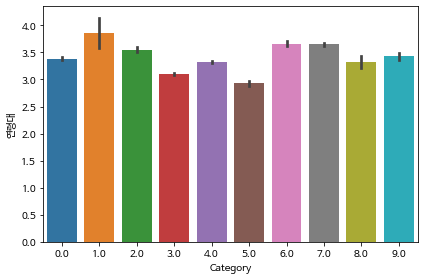

그림 저장: 연도별 연령대 2019


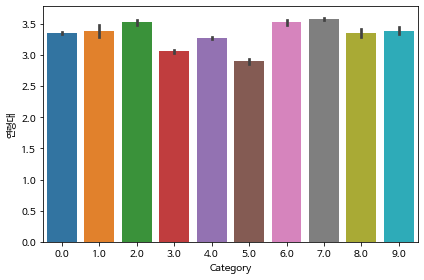

In [ ]:
sns.barplot(x = 'Category',y='연령대',data=a)
save_fig('연도별 연령대 2020')
plt.show()
sns.barplot(x = 'Category',y='연령대',data=b)
save_fig('연도별 연령대 2019')
plt.show()